<a href="https://colab.research.google.com/github/VitaliyRepko/Machine-Learning/blob/main/%D0%9B%D0%A06_%D0%9C%D0%9D_%D0%A0%D0%B5%D0%BF%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Репко Віталій Андрійович ФІТ 4-8
##### Був присутній на парі

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder, StandardScaler, LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("unmoved/cure-the-princess")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/unmoved/cure-the-princess/versions/1


In [ ]:
df = pd.read_csv(os.path.join(path, "data.csv"))
df

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8,0
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4,1
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2,1
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1,1


1. **Phoenix Feather (Перо фенікса)** — перо міфічної птиці фенікса, який згорає, а потім відроджується з власного попелу. Це символізує відродження, вічне життя та силу.<br>
2. **Unicorn Horn (Ріг єдинорога)** — ріг міфічної істоти єдинорога, який часто асоціюється з чистотою та цілющою силою. У багатьох легендах вважалося, що ріг єдинорога має магічні властивості, зокрема здатність лікувати отруєння.<br>
3. **Dragon's Blood (Кров дракона)** — кров дракона, міфічної істоти, часто вважається дуже потужним магічним зіллям або елементом. Це може символізувати силу, енергію чи небезпеку.<br>
4. **Mermaid Tears (Сльози русалки)** — сльози міфічної істоти — русалки. У різних культурах їх вважають рідкісним і дуже цінним елементом, що має магічні властивості, часто пов'язані з любов'ю або трагічними подіями.<br>
5. **Fairy Dust (Пилок феї)** — магічний пилок, що належить феям у народних казках. Зазвичай він використовується для чарівних перетворень, польотів або інших магічних дій.<br>
6. **Goblin Toes (Палець гобліна)** — палець гобліна, вигаданої істоти з міфів, що зазвичай асоціюється з хитрістю і злісними чарами. Цей елемент може мати магічну силу або використовуватися в темних чарах.<br>
7. **Witch's Brew (Зілля відьми)** — зілля, яке варить відьма, часто містить магічні або отруйні інгредієнти. Це часто асоціюється з темною магією або чарами.<br>
8. **Griffin Claw (Лапа грифона)** — лапа грифона, міфічної істоти, що є поєднанням орла і лева. Грифон символізує силу та відвагу, а його лапа може вважатися потужним магічним предметом.<br>
9. **Troll Hair (Волосся троля)** — волосся троля, ще однієї міфічної істоти, часто описуваної як агресивна та неприємна істота. Волосся троля може бути використане в магічних або темних ритуалах.<br>
10. **Kraken Ink (Чорнила кракена)** — чорнила, що отримуються від кракена, гігантської морської істоти. У фентезі вони можуть використовуватись для темних магічних ритуалів або для створення важливих символів.<br>
11. **Minotaur Horn (Ріг минотавра)** — ріг минотавра, міфічного чудовиська з головою бика і тілом людини. Ріг минотавра може символізувати силу і агресію, і в магічному контексті бути потужним інгредієнтом.<br>
12. **Basilisk Scale (Луска базиліска)** — луска базиліска, міфічної істоти, яка може вбивати своїм поглядом. Луска базиліска у фентезі часто використовується як компонент у потужних зіллях або зброї.<br>
13. **Chimera Fang (Зуб хімери)** — зуб хімери, міфічної істоти, яка поєднує різні тварини, такі як лев, коза і змія. Зуб хімери часто використовується в магічних зіллях або як символ сили та багатофункціональності.<br>
14. **Cured (Вилікуваний)** — ця ознака може означати, що елемент або субстанція була оброблена або виправлена певним способом, наприклад, для досягнення певних властивостей або збереження якості.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phoenix Feather  2338 non-null   float64
 1   Unicorn Horn     2338 non-null   float64
 2   Dragon's Blood   2338 non-null   float64
 3   Mermaid Tears    2338 non-null   float64
 4   Fairy Dust       2338 non-null   float64
 5   Goblin Toes      2338 non-null   float64
 6   Witch's Brew     2338 non-null   float64
 7   Griffin Claw     2338 non-null   float64
 8   Troll Hair       2338 non-null   float64
 9   Kraken Ink       2338 non-null   float64
 10  Minotaur Horn    2338 non-null   float64
 11  Basilisk Scale   2338 non-null   float64
 12  Chimera Fang     2338 non-null   float64
 13  Cured            2338 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 255.8 KB


In [ ]:
df.isnull().sum()

,0
Phoenix Feather,0
Unicorn Horn,0
Dragon's Blood,0
Mermaid Tears,0
Fairy Dust,0
Goblin Toes,0
Witch's Brew,0
Griffin Claw,0
Troll Hair,0
Kraken Ink,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,15.365697,10.946749,16.115654,13.627973,15.069504,14.157271,12.328914,14.911206,16.871685,14.890590,10.916125,15.371600,12.084003,0.496578
std,8.669969,7.225162,8.372518,7.545244,8.349340,7.831476,7.709753,8.132678,9.579027,8.014197,7.045195,8.559139,8.047540,0.500095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.500000,5.300000,9.600000,7.600000,8.625000,7.900000,6.325000,8.400000,8.900000,8.800000,5.200000,8.800000,5.600000,0.000000
50%,14.700000,9.500000,15.800000,13.100000,14.500000,13.500000,11.200000,14.400000,16.300000,14.400000,9.700000,14.800000,10.500000,0.000000
75%,21.300000,15.575000,22.000000,19.000000,20.700000,19.500000,16.900000,20.500000,24.000000,20.400000,15.375000,21.100000,17.275000,1.000000
max,42.100000,34.100000,40.800000,35.800000,40.400000,37.800000,37.300000,39.400000,44.800000,39.500000,33.700000,42.000000,37.800000,1.000000


In [ ]:
df['Cured'].value_counts()

,count
Cured,
0,1177
1,1161


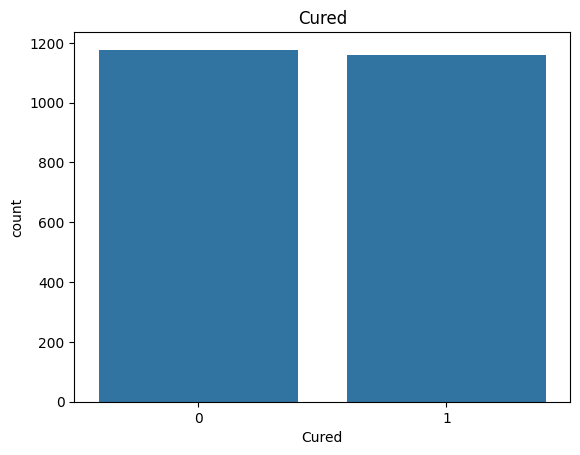

In [ ]:
sns.countplot(x='Cured', data=df)
plt.title('Cured')
plt.show()

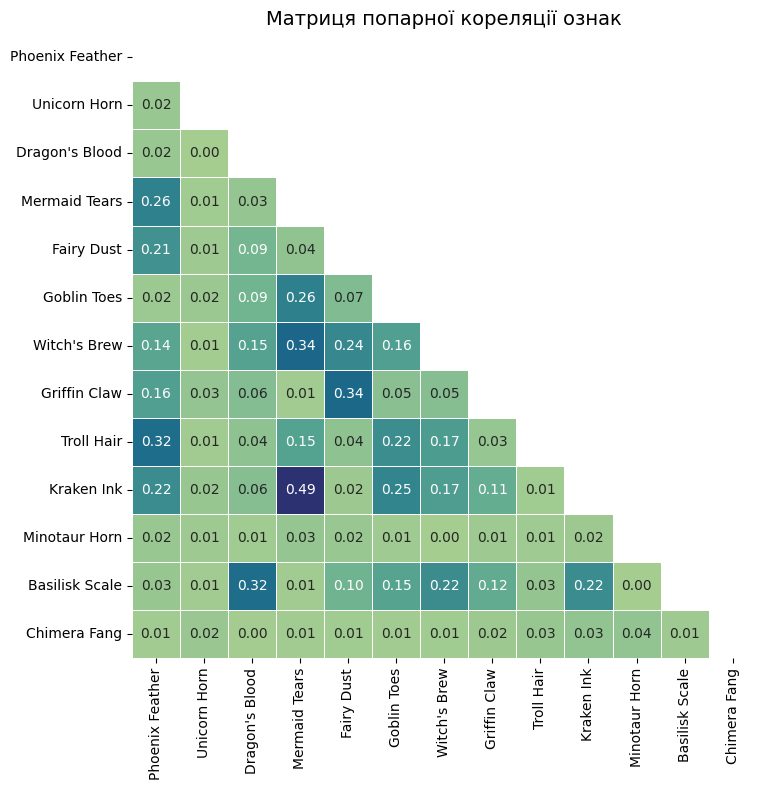

In [ ]:
mtx = df.drop('Cured', axis = 1).corr(numeric_only=True).abs()

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    mtx,
    cmap='crest',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    mask=np.triu(np.ones_like(mtx, dtype=bool)),
    square=True,
    cbar=False,
    ax=ax
)

plt.title("Матриця попарної кореляції ознак", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
corr_pr = df.corr(numeric_only=True)['Cured'].abs().sort_values(ascending=False)
corr_pr

,Cured
Cured,1.000000
Troll Hair,0.498165
Witch's Brew,0.245993
Basilisk Scale,0.052436
Goblin Toes,0.046314
Kraken Ink,0.022845
Chimera Fang,0.022144
Phoenix Feather,0.015931
Fairy Dust,0.015004
Minotaur Horn,0.011329


In [ ]:
X = df.drop('Cured', axis=1)
y = df['Cured']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 89.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       231
           1       0.90      0.89      0.89       237

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.89       468



In [ ]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[207,  24],
       [ 26, 211]])

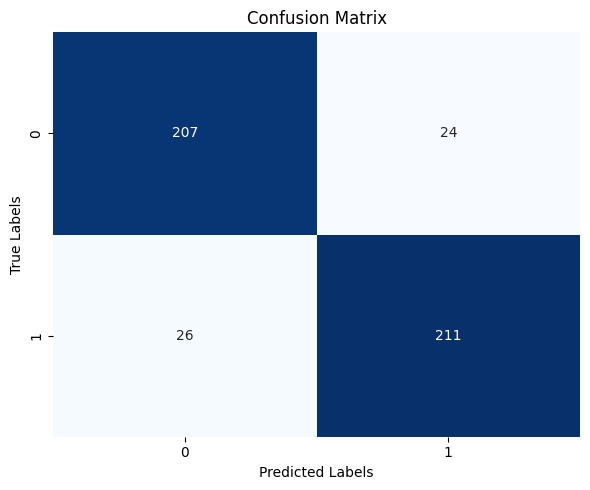

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

# Додаємо заголовки
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Показуємо графік
plt.tight_layout()
plt.show()

In [ ]:
# Створюємо датафрейм
comparison_df = pd.DataFrame({
    "True Class": y_test.values,
    "Predicted Class": y_pred
})

# Вибираємо 10 випадкових зразків
random_samples = comparison_df.sample(10, random_state=42)

print("\n10 випадкових зразків:")
print(random_samples)


10 випадкових зразків:
     True Class  Predicted Class
55            0                1
63            0                0
33            1                0
297           1                1
72            1                1
228           0                0
209           1                1
9             1                1
428           0                0
231           1                1


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # параметр регуляризації
    'solver': ['lbfgs', 'liblinear'],  # алгоритми оптимізації
    'max_iter': [100, 200, 300]  # кількість ітерацій
}

# Для RandomizedSearchCV
param_dist = {
    'solver': ['liblinear', 'lbfgs'],
    'C': np.logspace(-2, 2, 10),
    'max_iter': [100, 500]
}

In [ ]:
grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)
grid.fit(X_train_scaled, y_train)

print("GridSearchCV найкращі параметри:")
print(grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
GridSearchCV найкращі параметри:
{'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}


In [ ]:
random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

print("RandomizedSearchCV найкращі параметри:")
print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
RandomizedSearchCV найкращі параметри:
{'solver': 'liblinear', 'max_iter': 500, 'C': np.float64(4.6415888336127775)}


In [ ]:
best_model = random_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 89.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       231
           1       0.90      0.89      0.89       237

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.89       468



In [ ]:
best_model = grid.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 89.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       231
           1       0.90      0.89      0.89       237

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.89       468



In [ ]:
# Метод опорних векторів
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

conf_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Confusion Matrix:")
print(conf_svm)

SVM Accuracy: 95.94%

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       231
           1       0.96      0.96      0.96       237

    accuracy                           0.96       468
   macro avg       0.96      0.96      0.96       468
weighted avg       0.96      0.96      0.96       468


SVM Confusion Matrix:
[[221  10]
 [  9 228]]


In [ ]:
# Модель дерева рішень
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

conf_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Confusion Matrix:")
print(conf_dt)

Decision Tree Accuracy: 86.54%

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       231
           1       0.88      0.86      0.87       237

    accuracy                           0.87       468
   macro avg       0.87      0.87      0.87       468
weighted avg       0.87      0.87      0.87       468


Decision Tree Confusion Matrix:
[[202  29]
 [ 34 203]]
